In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from datetime import datetime

In [11]:
# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-5.796362039607558 4.381777164401171
-38.23609214881931 72.50723808997591
11.623585861187223 79.69661341238105
13.284626693226755 1.3255806565385342
30.459457470781203 -144.62390190876488
-4.989999598891018 -11.89874265032995
-68.51761489947626 -57.51898586199131
-12.691259856683402 -37.839118457828846
-63.47947209066306 122.00998048707032
75.284337573795 -157.93653868071019
-7.6668047612230055 130.60152486825763
-87.29221863665502 122.04610055490065
-17.79218725223062 -98.10329370486396
-20.603145593348543 -30.211437971912744
-72.72559146491086 164.4444078984926
-86.94111510616638 167.47308853229822
8.99869492305416 95.70070124751874
2.4582095519556475 -119.72492369021828
15.58887211752905 169.67704665539787
3.3802935678501314 -156.15631051330863
-68.65947203257409 96.84092082450593
-72.99326721521034 -64.90490121704737
-61.80188074106975 125.17542204079257
-87.53816888907608 -131.63081033680643
66.03875835676544 114.9470053434016
81.61030644330765 -137.5358897345386
0.031509885597969

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
import requests
requests.__version__

'2.27.1'

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gamba
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | kurinjippadi
Processing Record 4 of Set 1 | niamey
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | camacari
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | caravelas
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | kathu
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | udachnyy
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | ixtapa
Processi

Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | ilulissat
Processing Record 42 of Set 4 | sinjar
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | sosnovo-ozerskoye
Processing Record 47 of Set 4 | albion
Processing Record 48 of Set 4 | ust-tsilma
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | xicotencatl
Processing Record 1 of Set 5 | almaznyy
Processing Record 2 of Set 5 | diffa
Processing Record 3 of Set 5 | jimenez
Processing Record 4 of Set 5 | gerash
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | poya
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | rameswaram
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of Set 5 | beringovskiy
Processing Record 12 of Set 5 | alofi
Processing Record 13 of S

Processing Record 31 of Set 8 | ranong
Processing Record 32 of Set 8 | longyearbyen
Processing Record 33 of Set 8 | oksfjord
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | nechi
Processing Record 36 of Set 8 | puerto leguizamo
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | marshall
Processing Record 39 of Set 8 | pangai
Processing Record 40 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 8 | antofagasta
Processing Record 42 of Set 8 | palauig
Processing Record 43 of Set 8 | puerto gaitan
Processing Record 44 of Set 8 | oum hadjer
Processing Record 45 of Set 8 | acapulco
Processing Record 46 of Set 8 | santa rosalia
Processing Record 47 of Set 8 | margara
Processing Record 48 of Set 8 | mareeba
Processing Record 49 of Set 8 | mtwango
Processing Record 50 of Set 8 | harper
Processing Record 1 of Set 9 | axim
Processing Record 2 of Set 9 | quime
Processing Record 3 of Set 9 | port augusta
Processing Record

Processing Record 19 of Set 12 | pacifica
Processing Record 20 of Set 12 | lerwick
Processing Record 21 of Set 12 | garissa
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | murray bridge
Processing Record 25 of Set 12 | nemuro
Processing Record 26 of Set 12 | san policarpo
Processing Record 27 of Set 12 | kieta
Processing Record 28 of Set 12 | dien bien
City not found. Skipping...
Processing Record 29 of Set 12 | lubbock
Processing Record 30 of Set 12 | mitsamiouli
Processing Record 31 of Set 12 | ayan
Processing Record 32 of Set 12 | vila
Processing Record 33 of Set 12 | porangatu
Processing Record 34 of Set 12 | vila do maio
Processing Record 35 of Set 12 | grand gaube
Processing Record 36 of Set 12 | viedma
Processing Record 37 of Set 12 | bikaner
Processing Record 38 of Set 12 | mackenzie
Processing Record 39 of Set 12 | yarada
Processing Record 40 of Set 12 | otjimbingwe
Processing Record 41 of Set 12 | p

In [32]:
len(city_data)

563

In [33]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gamba,-2.6500,10.0000,71.33,91,56,4.09,GA,2022-06-28 23:42:43
1,Mahebourg,-20.4081,57.7000,66.49,88,40,12.66,MU,2022-06-28 23:42:43
2,Kurinjippadi,11.5667,79.6000,84.02,61,84,5.70,IN,2022-06-28 23:42:43
3,Niamey,13.5137,2.1098,93.49,40,0,10.36,NE,2022-06-28 23:42:44
4,Hilo,19.7297,-155.0900,83.28,69,100,8.01,US,2022-06-28 23:42:44
...,...,...,...,...,...,...,...,...,...
558,Saint-Pierre,-21.3393,55.4781,64.08,77,100,13.80,RE,2022-06-28 23:58:27
559,Port Hedland,-20.3167,118.5667,64.45,36,0,11.50,AU,2022-06-28 23:58:04
560,Kawalu,-7.3817,108.2082,71.04,87,97,1.28,ID,2022-06-28 23:59:28
561,Sennoy,52.1509,46.9631,50.43,80,9,4.41,RU,2022-06-28 23:59:28


In [35]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gamba,GA,2022-06-28 23:42:43,-2.6500,10.0000,71.33,91,56,4.09
1,Mahebourg,MU,2022-06-28 23:42:43,-20.4081,57.7000,66.49,88,40,12.66
2,Kurinjippadi,IN,2022-06-28 23:42:43,11.5667,79.6000,84.02,61,84,5.70
3,Niamey,NE,2022-06-28 23:42:44,13.5137,2.1098,93.49,40,0,10.36
4,Hilo,US,2022-06-28 23:42:44,19.7297,-155.0900,83.28,69,100,8.01
...,...,...,...,...,...,...,...,...,...
558,Saint-Pierre,RE,2022-06-28 23:58:27,-21.3393,55.4781,64.08,77,100,13.80
559,Port Hedland,AU,2022-06-28 23:58:04,-20.3167,118.5667,64.45,36,0,11.50
560,Kawalu,ID,2022-06-28 23:59:28,-7.3817,108.2082,71.04,87,97,1.28
561,Sennoy,RU,2022-06-28 23:59:28,52.1509,46.9631,50.43,80,9,4.41


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

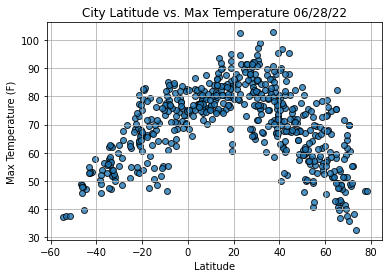

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

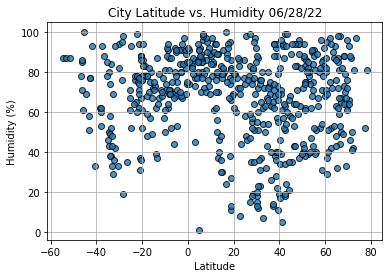

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

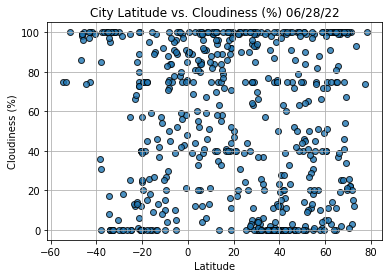

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show

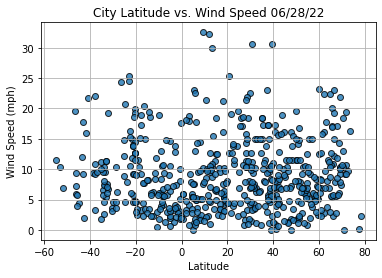

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()